# Classification

We would be using MNIST dataset preloaded in Sklearn library 

Loading the Data

In [1]:
from sklearn import datasets
digits=datasets.load_digits()

In [2]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
X,y=digits['data'],digits['target']

In [4]:
X.shape

(1797, 64)

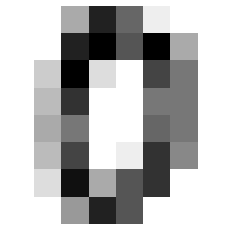

In [67]:

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

This looks like a zero let's check what is the designated label

In [6]:
y[0]

0

In [7]:
digits["DESCR"]

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Binary Classification

For now we are trying just to check whether the number is 0 or not

In [9]:
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=0)
sgd_clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In Starting we kept some_digit=X[0] which was zero

In [11]:
sgd_clf.predict([some_digit])

array([ True])

Cross Validation process using Stratified Sampling

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=0)

for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_0[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_0[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9979123173277662
1.0
0.9958246346555324


C:\Users\TANMEY\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Now doing crosss Validation using sklearn library

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.99791232, 1.        , 0.99582463])

This classifier always classify not zero

In [14]:
from sklearn.base import BaseEstimator
import numpy as np
class Never0Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [15]:
never_0_clf = Never0Classifier()
cross_val_score(never_0_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.88100209, 0.89352818, 0.91022965])

This is as expected 90% we are correct if we just say image is not 0 as the images are equally distributed

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3,verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


cross_val_predict return the predictions made by model 

In this case sgd_clf

In [17]:
y_train_pred.shape

(1437,)

In [18]:
y_train.shape

(1437,)

### Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_0,y_train_pred)

array([[1285,    1],
       [   2,  149]], dtype=int64)

Prefect classifier has only diagonal element in confusion matrix 

 $$\begin {pmatrix} TN & FP \\ FN & TP \end{pmatrix} $$

Actual is along y axis and prediction is along x axis

calculation of Precision and recall

In [20]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_0,y_train_pred)

0.9933333333333333

In [21]:
recall_score(y_train_0,y_train_pred)

0.9867549668874173

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_0,y_train_pred)

0.9900332225913622


High F1 score means it is quite descent model

SGD classifier makes decision on comparing score with threshold and decide the label accordingly

So if you want to have your own threshold, call sgd_clf.decision_function() , this will return you the score and now you can compare it with your own threshold and decide the label

For example

In [23]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2474.41789449])

In [24]:
threshold = 500
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

As we have score greater than threshold so we have label it true

### How to decide the threshold?


In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3,method="decision_function")
y_scores

array([-4467.37880899, -5727.67177943, -3200.15162688, ...,
       -6296.9770496 , -6647.25248875, -4887.56014907])

In [26]:
max(y_scores)

4403.573828684967

This returned the score calculated by SGD classifier

In [27]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_0,y_scores)

In [28]:
min(precisions)

0.974025974025974

In [29]:
max(precisions)

1.0

In [30]:
min(recalls)

0.0

In [31]:
max(recalls)

1.0

So you can see the min precision is only 97.4% whereas the min recall is 0 so it is quite difficult to see in graph the tradeoff but we still try

In [32]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-10000, 5000, 0, 1])             



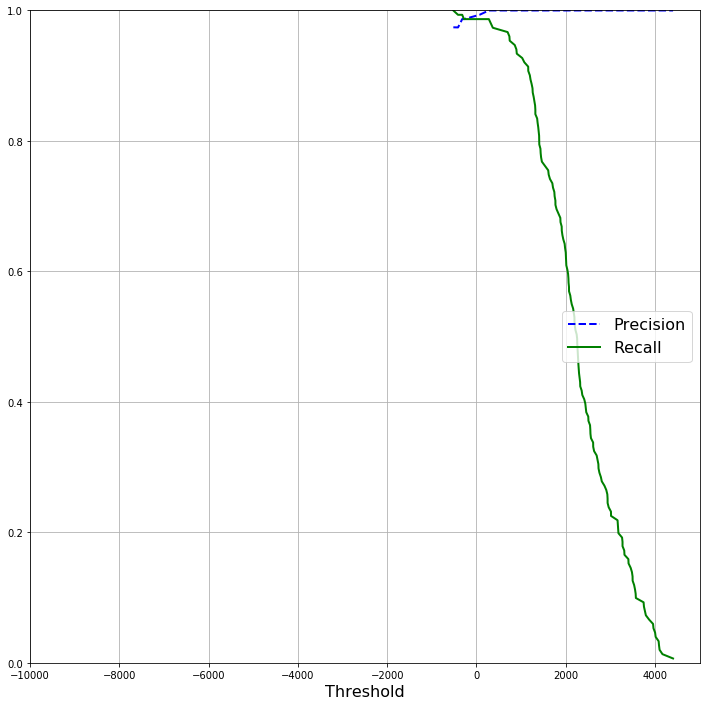

In [33]:
plt.figure(figsize=(12, 12))                                                                 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

So you can see when we try to increase precision to one recall falls

Precision generally increases when threshold is increased

recall is non increasing every time when threshold is increased

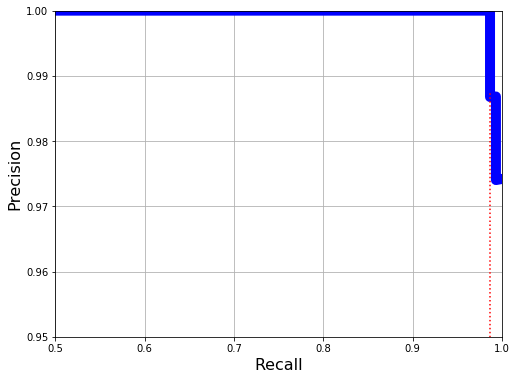

In [34]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=10)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0.5, 1, 0.95, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.9868, 0.9868], [0., 0.9875], "r:")


So let's we decided to get 98.75% precisions then we will search the lowest threshold that gives us this precision
As we felt precsion drops rapidly at 98.75%

In [35]:
new_thresholds = thresholds[np.argmax(precisions >= 0.9875)]
new_thresholds

67.22625566763583

In [36]:
y_new_thresholds=(y_scores>=new_thresholds)

In [37]:
precision_score(y_train_0,y_new_thresholds)

0.9933333333333333

In [38]:
recall_score(y_train_0,y_new_thresholds)

0.9867549668874173

0.9933333333333333,0.9867549668874173 was our previous ans also so seems like sgd classifier found our threshold to be 67.22... 

SIde note we decide to check threshold for 99.99 min precision we got threshold of 277.35 and found precision to be 1 and recall same

## ROC curve

This is plotted against TPR( recall) and FPR(1-specificity) 


Just formula revision for important characterstics of classification model

Precision= $\frac{TP}{TP+FP}$

Recall=  $\frac{TP}{TP+FN}$

Specificity =  $\frac{TN}{TN+FP}$


In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

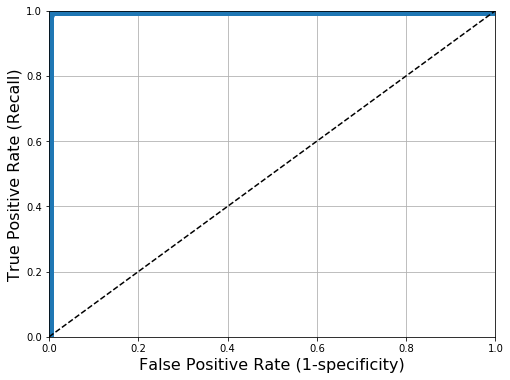

In [40]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=10, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (1-specificity)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)
    
plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)

Ideal classifier has an area under ROC curve as 1 , which by looking at graph I think we have found in SGD classifier model, let's check numerical value

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_0, y_scores)

0.9999691017890064

# Random Forest Classifiers

Now let's play with Random Forest classifiers

In [42]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=0)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3,method="predict_proba")

In [43]:
y_probas_forest

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.97, 0.03],
       ...,
       [0.97, 0.03],
       [0.99, 0.01],
       [1.  , 0.  ]])

In [44]:
y_scores_forest = y_probas_forest[:, 1]

This gives the probabibility that the image is zero

In [45]:
y_forest_class_pred=y_scores_forest>=0.5

Basic Characterstics of Random Forest Classifier

In [46]:
precision_score(y_train_0,y_forest_class_pred)

1.0

In [47]:
recall_score(y_train_0,y_forest_class_pred)

0.9668874172185431

In [48]:
confusion_matrix(y_train_0,y_forest_class_pred)

array([[1286,    0],
       [   5,  146]], dtype=int64)

Now Let's draw ROC curve

In [49]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0,y_scores_forest)

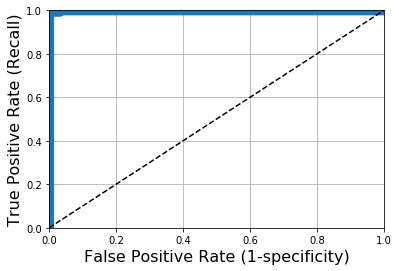

In [50]:
plot_roc_curve(fpr_forest, tpr_forest)

Let's calculate the area

In [51]:
roc_auc_score(y_train_0, y_scores_forest)

0.9997734131193804

.9999691017890064 was the AUC of ROC of SGD classifier so SGD wins for this dataset

# Multiclass classification

In [53]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

array([0])

You might think SVM is binary classifier how did it classified, but it uses OvO strategy and creates 45 binary classifier and selects the class which won maximium number of duels

If you want to see how what is the scores of different classes this some_digit data point had use decision_function([some_digit]) command

In [55]:
scores=svm_clf.decision_function([some_digit])
scores

array([[ 9.30937873, -0.29737221,  1.76231819,  4.8269505 ,  2.77049364,
         7.21565654,  2.79009374,  1.76049338,  6.13151673,  8.24782069]])

You can clearly see 0 class has the highest scores so our final prediction is zero

To check all the target classes you can use the following command

In [56]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You can force scikit learn library to use OvO or OvR strategy

### SVM as OvR

In [68]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([0])

### SGD classifier as multiclass Classifier

In [69]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([0])

In [70]:
sgd_clf.decision_function([some_digit])

array([[ 2476.857568  , -3629.52139818, -2459.54131587, -2573.80163787,
        -2064.66920229, -2172.29518722, -1749.24136161,  -896.9997386 ,
         -581.92602001,  -978.59527269]])

You can see 0 class has max_score, just a side note we will not consider absolute values

### Cross Validation for SGD classifier

In [73]:
cross_scores=cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")
cross_scores

array([0.94989562, 0.94780793, 0.94989562])

We get 94% accuracy on all 3 folds

In [76]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train,cv=3)

In [77]:
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[149,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0, 139,   0,   3,   1,   0,   1,   1,   1,   1],
       [  0,   0, 137,   3,   0,   0,   0,   0,   0,   1],
       [  0,   0,   1, 145,   0,   1,   0,   0,   3,   4],
       [  0,   3,   0,   0, 144,   0,   0,   1,   1,   2],
       [  0,   2,   0,   1,   0, 134,   1,   0,   1,   3],
       [  0,   1,   0,   0,   0,   1, 133,   0,   2,   0],
       [  0,   0,   0,   0,   0,   2,   0, 135,   2,   1],
       [  0,  12,   0,   2,   0,   0,   0,   0, 119,   2],
       [  0,   1,   0,   3,   0,   0,   0,   1,   5, 129]], dtype=int64)

This seems a good decent model 

As they say picture says thousand words let's draw confusion matrix as image

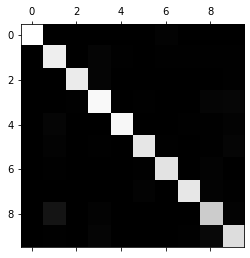

In [88]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

The 0s look slightly
darker than the other digits, which could mean that there are fewer images of 0s
in the dataset or that the classifier does not perform as well on 0s as on other
digits.

To get better idea of performance of model we calculate error rates

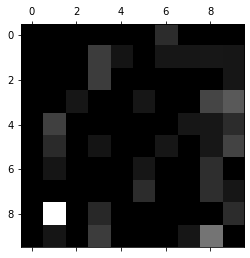

In [93]:
rows_sum=conf_mx.sum(axis=1)
norm_conf_mx=conf_mx/rows_sum
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)

Form this we can see there are few 8 which are classified as 1

1 is also misclassified a lot


To remove this misclassfication one should try reduce false 1s and reduce misclassification of 8 as 1

- Try getting more images for 1 and 8

- Use feature engineering to engineer more features 

- Pre process images using Scikit-Image, Pillow, or OpenCV libraries to make some patterns,such as closed loops, stand out more

In [100]:
def plot_digits(instances, images_per_row=10, **options):
    size = 8
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

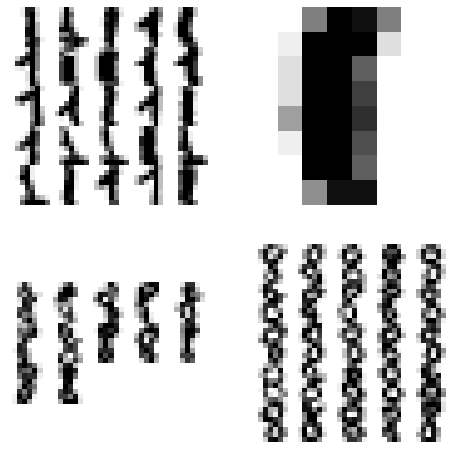

In [103]:
cl_a=1, 
cl_b=8
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

Now this is 8*8 image so it is difficult to understand how could we improve the model by preprocessing or any other above mentioned way but if size was better maybe we could have guessed it

# Multilabel Classification

In [108]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 6)
y_train_even = (y_train % 2 == 0)
y_multilabel = np.c_[y_train_large, y_train_even]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [109]:
knn_clf.predict([some_digit])

array([[False,  True]])

Evaluation of multilabel classifier

In [110]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel,cv=3)

In [112]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9873121234098223

# Multioutput Classification

We are trying to remove the noise from image

In [113]:
noise = np.random.randint(0, 100, (len(X_train), 64))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 64))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

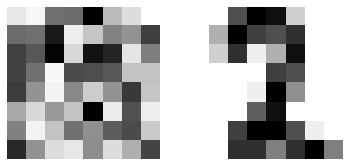

In [114]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])

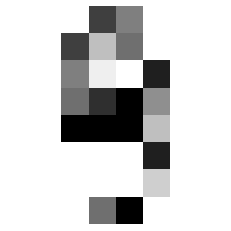

In [115]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

## KNN classifier

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf2 = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [118]:
y_knn_pred = knn_clf2.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9833333333333333

Knn classifier has 98.33% accuracy

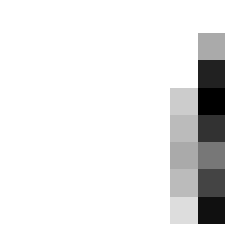

In [123]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(8, 8), [dy, dx], cval=new).reshape(64)

plot_digit(shift_digit(some_digit, 5, 1, new=0))

In [124]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((7185, 64), (7185,))

In [125]:
knn_clf2.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [126]:
y_knn_expanded_pred = knn_clf2.predict(X_test)

In [127]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9916666666666667

We shifted pixels by 1 in each direction and added them in our training set and it improved the accuracy

In [129]:
ambiguous_digit = X_test[258]
knn_clf2.predict_proba([ambiguous_digit])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

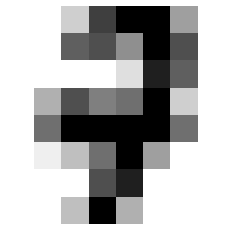

In [135]:
plot_digit(ambiguous_digit)